In [1]:
import sqlite3
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/ramprakashyallavula/Downloads/ecommerce project/Ecommerce_Sales_Prediction_Dataset.csv")

# Connect to SQLite database (it will create the database file if it doesn't exist)
conn = sqlite3.connect('/Users/ramprakashyallavula/Downloads/ecommerce_sales.db')
cursor = conn.cursor()

# 1. Create tables in the database (Products, CustomerSegments, Sales)
cursor.execute("""
    CREATE TABLE IF NOT EXISTS Products (
        ProductID INTEGER PRIMARY KEY AUTOINCREMENT,
        ProductCategory TEXT,
        Price REAL,
        Discount REAL
    );
""")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS CustomerSegments (
        CustomerSegmentID INTEGER PRIMARY KEY AUTOINCREMENT,
        CustomerSegmentName TEXT
    );
""")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS Sales (
        SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
        SaleDate TEXT,
        ProductID INTEGER,
        CustomerSegmentID INTEGER,
        UnitsSold INTEGER,
        MarketingSpend REAL,
        FOREIGN KEY (ProductID) REFERENCES Products(ProductID),
        FOREIGN KEY (CustomerSegmentID) REFERENCES CustomerSegments(CustomerSegmentID)
    );
""")

# 2. Insert data into Products and CustomerSegments tables
# First, insert unique products into the Products table
products_df = df[['Product_Category', 'Price', 'Discount']].drop_duplicates()

for _, row in products_df.iterrows():
    cursor.execute("""
        INSERT INTO Products (ProductCategory, Price, Discount)
        VALUES (?, ?, ?)
    """, (row['Product_Category'], row['Price'], row['Discount']))

# Insert unique customer segments into the CustomerSegments table
customer_segments_df = df[['Customer_Segment']].drop_duplicates()

for _, row in customer_segments_df.iterrows():
    cursor.execute("""
        INSERT INTO CustomerSegments (CustomerSegmentName)
        VALUES (?)
    """, (row['Customer_Segment'],))

# Commit the changes
conn.commit()

# 3. Insert data into the Sales table
for _, row in df.iterrows():
    # Get ProductID and CustomerSegmentID for each sale record
    cursor.execute("""
        SELECT ProductID FROM Products WHERE ProductCategory = ?
    """, (row['Product_Category'],))
    product_id = cursor.fetchone()[0]
    
    cursor.execute("""
        SELECT CustomerSegmentID FROM CustomerSegments WHERE CustomerSegmentName = ?
    """, (row['Customer_Segment'],))
    customer_segment_id = cursor.fetchone()[0]
    
    cursor.execute("""
        INSERT INTO Sales (SaleDate, ProductID, CustomerSegmentID, UnitsSold, MarketingSpend)
        VALUES (?, ?, ?, ?, ?)
    """, (row['Date'], product_id, customer_segment_id, row['Units_Sold'], row['Marketing_Spend']))

# Commit the changes and close the connection
conn.commit()

# Close the database connection
conn.close()

print("Normalized database created and data inserted successfully.")

Normalized database created and data inserted successfully.


In [2]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/Users/ramprakashyallavula/Downloads/ecommerce_sales.db')

# SQL JOIN query to fetch data
query = """
    SELECT
        P.ProductCategory,
        P.Price,
        P.Discount,
        CS.CustomerSegmentName,
        S.SaleDate,
        S.UnitsSold,
        S.MarketingSpend
    FROM Sales S
    INNER JOIN Products P ON S.ProductID = P.ProductID
    INNER JOIN CustomerSegments CS ON S.CustomerSegmentID = CS.CustomerSegmentID
"""

# Execute the query and load the result into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

# Display the DataFrame in the notebook
print(df.head())  # Shows the first few rows

  ProductCategory   Price  Discount CustomerSegmentName    SaleDate  \
0          Sports  932.80     35.82          Occasional  01-01-2023   
1            Toys  569.48      3.60             Premium  02-01-2023   
2      Home Decor  699.68      3.56             Premium  03-01-2023   
3            Toys  569.48      3.60             Premium  04-01-2023   
4            Toys  569.48      3.60             Premium  05-01-2023   

   UnitsSold  MarketingSpend  
0         32         6780.38  
1         16         6807.56  
2         27         3793.91  
3         29         9422.75  
4         17         1756.83  


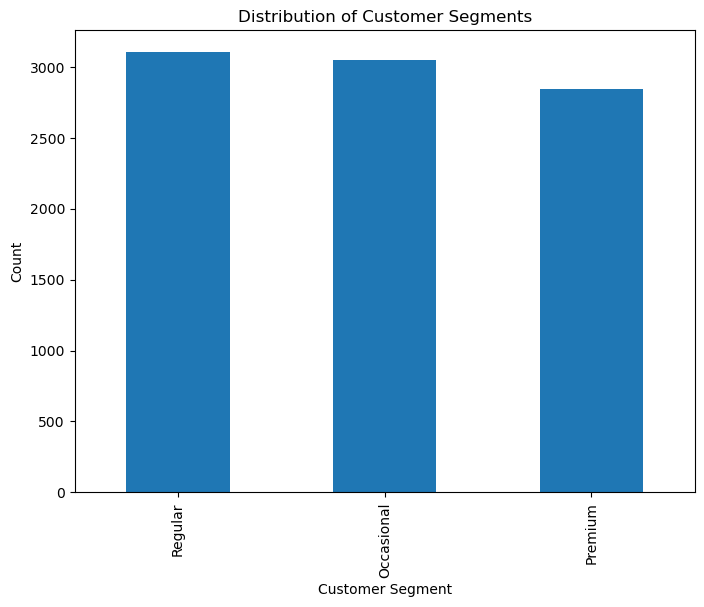

Training set size: 7200 samples
Test set size: 1800 samples


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's already loaded as `df`)
# Choose the appropriate target column based on the model you're using
# For Logistic Regression (Classification), use 'CustomerSegmentName'
# For Regression (Linear Regression, etc.), use 'UnitsSold'

# Example: For Logistic Regression (Classification)
target_column = 'CustomerSegmentName'  # Use 'CustomerSegmentName' for Logistic Regression

# Example: For Linear Regression (Regression)
# target_column = 'UnitsSold'  # Use 'UnitsSold' for Regression models

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))

if target_column == 'UnitsSold':
    # For regression, we plot the distribution of units sold
    df[target_column].hist(bins=50)
    plt.title('Distribution of Units Sold')
    plt.xlabel('Units Sold')
    plt.ylabel('Frequency')
    plt.show()
else:
    # For classification, check the distribution of customer segments
    df[target_column].value_counts().plot(kind='bar')
    plt.title('Distribution of Customer Segments')
    plt.xlabel('Customer Segment')
    plt.ylabel('Count')
    plt.show()

# Determine if stratification is needed
if target_column == 'CustomerSegmentName':
    stratify_column = 'CustomerSegmentName'
    stratify = True
else:
    stratify_column = None
    stratify = False

# Prepare features (X) and target (y)
X = df.drop(columns=[target_column])  # Features (all columns except target)
y = df[target_column]  # Target variable

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if stratify else None
)

# Output shapes of the splits to confirm
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The profiling report has been saved as 'ecommerce_data_profile.html'.
Missing values per column:
ProductCategory        0
Price                  0
Discount               0
CustomerSegmentName    0
SaleDate               0
UnitsSold              0
MarketingSpend         0
dtype: int64


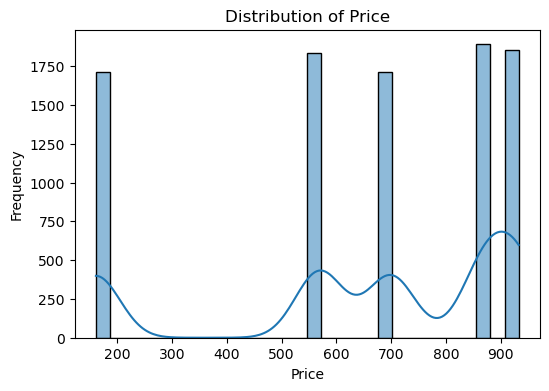

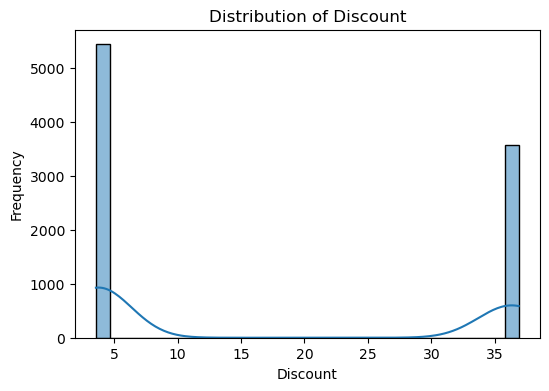

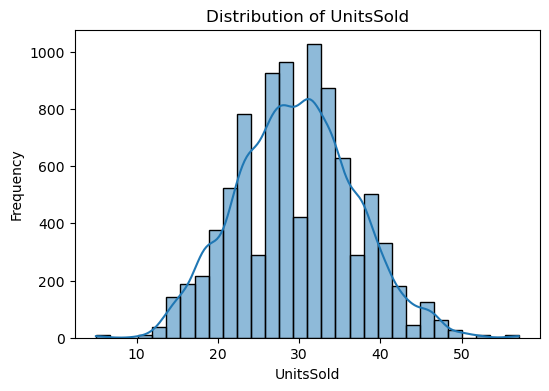

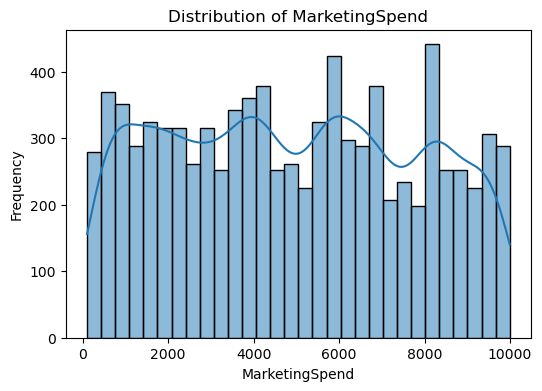

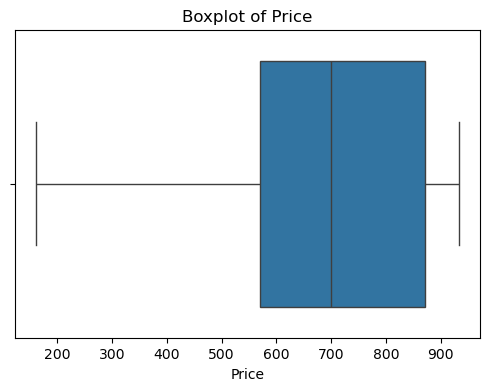

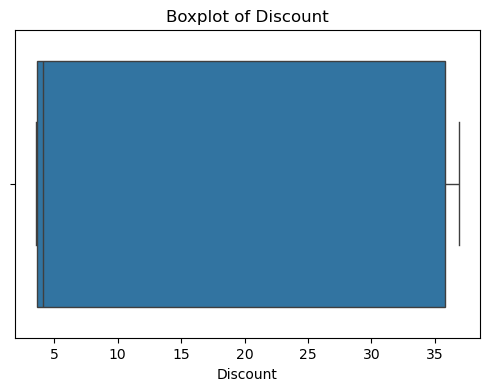

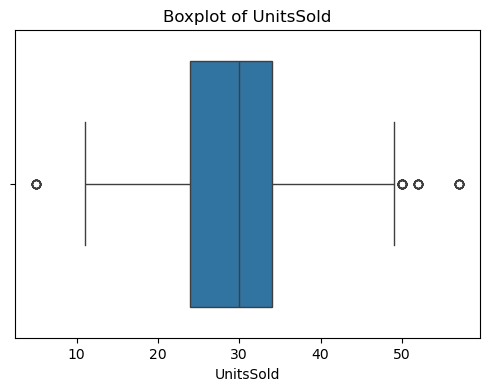

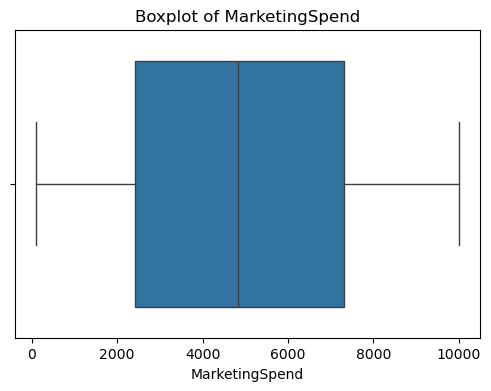

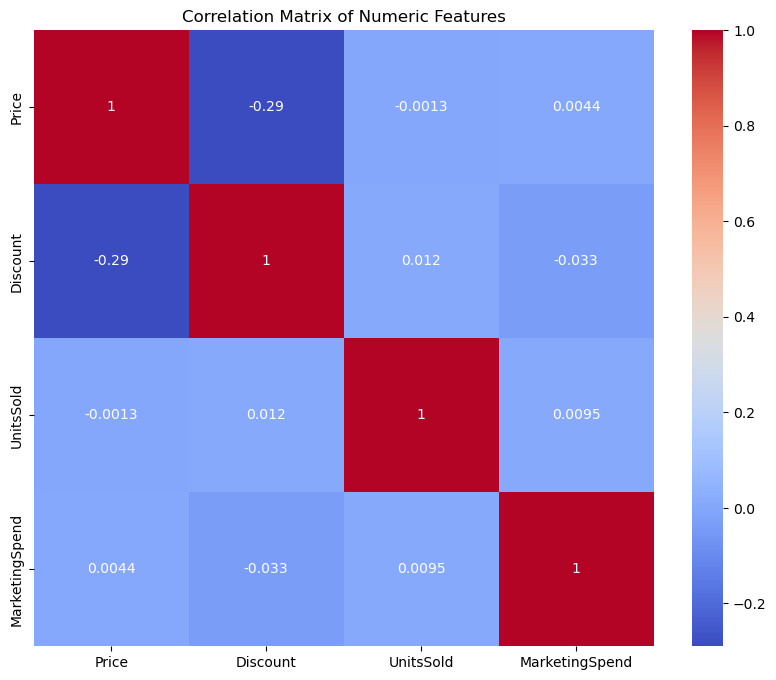

Summary statistics of numerical features:
             Price     Discount    UnitsSold  MarketingSpend
count  9000.000000  9000.000000  9000.000000     9000.000000
mean    654.813820    16.660020    29.631000     4912.830240
std     271.952109    15.931401     7.264758     2839.339745
min     161.010000     3.560000     5.000000      100.300000
25%     569.480000     3.600000    24.000000     2413.020000
50%     699.680000     4.110000    30.000000     4837.245000
75%     871.200000    35.820000    34.000000     7319.675000
max     932.800000    36.880000    57.000000     9995.620000

### Observations and Cleanup Tasks ###

1. Check for missing values and impute them as necessary.
2. Identify and remove or cap outliers in 'Price', 'Discount', 'Marketing_Spend', and 'Units_Sold' using thresholds or IQR.
3. Normalize or standardize numerical features for consistency.
4. Convert categorical columns to appropriate encoding.
5. Examine correlation matrix to reduce multicollinearity if neede

In [4]:
# Install pandas-profiling if not already installed
# !pip install pandas-profiling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# Step 1: Generate a detailed profile report using pandas-profiling
profile = ProfileReport(df, title="Ecommerce Sales Data Profile", explorative=True)
profile.to_file("ecommerce_data_profile.html")
print("The profiling report has been saved as 'ecommerce_data_profile.html'.")

# Step 2: Additional manual exploration
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Plot distributions for numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Check capped or outlier values using boxplots
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# Filter numeric columns for correlation matrix
numeric_df = df[numeric_columns]

# Compute and plot the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Step 3: Summary statistics for numerical features
print("Summary statistics of numerical features:")
print(df[numeric_columns].describe())

# Step 4: Observations and cleanup tasks
print("\n### Observations and Cleanup Tasks ###\n")
print("1. Check for missing values and impute them as necessary.")
print("2. Identify and remove or cap outliers in 'Price', 'Discount', 'Marketing_Spend', and 'Units_Sold' using thresholds or IQR.")
print("3. Normalize or standardize numerical features for consistency.")
print("4. Convert categorical columns to appropriate encoding.")
print("5. Examine correlation matrix to reduce multicollinearity if needed.")

In [5]:
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['ProductCategory', 'Price', 'Discount', 'SaleDate', 'UnitsSold',
       'MarketingSpend'],
      dtype='object')


In [6]:
numeric_features = ['Price', 'Discount', 'MarketingSpend']

Columns in X_train: Index(['ProductCategory', 'Price', 'Discount', 'SaleDate', 'UnitsSold',
       'MarketingSpend'],
      dtype='object')
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


Confusion Matrix:
 [[365  39 206]
 [296  64 209]
 [308  47 266]]


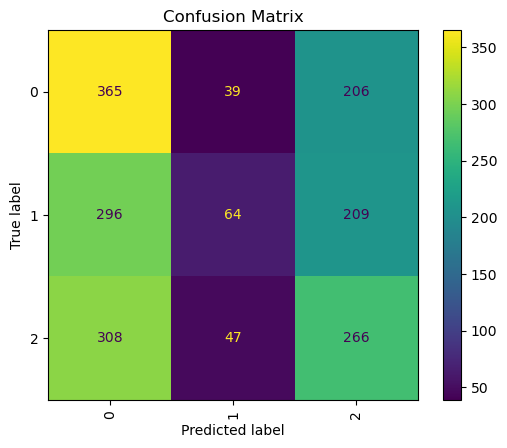

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.60      0.46       610
           1       0.43      0.11      0.18       569
           2       0.39      0.43      0.41       621

    accuracy                           0.39      1800
   macro avg       0.40      0.38      0.35      1800
weighted avg       0.40      0.39      0.35      1800



2024/12/21 22:21:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cross-validation mean F1-score: 0.33816468938402133
Cross-validation std F1-score: 0.014973678391830596
Test F1-score: 0.3496483693480193
🏃 View run ambitious-conch-282 at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/4/runs/212c64d9d26945449a03d101305612e9
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/4


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Debug column names in training data
print("Columns in X_train:", X_train.columns)

# Step 3: Define the preprocessing pipeline
numeric_features = ['Price', 'Discount', 'MarketingSpend']  # Match exact column names
categorical_features = ['ProductCategory']

log_transformer = FunctionTransformer(np.log1p, validate=True)

numeric_transformer = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Step 5: Log results to MLflow
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_1")

with mlflow.start_run():
    # Cross-validation
    cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    mlflow.log_metric("cv_mean_f1", mean_cv_score)
    mlflow.log_metric("cv_std_f1", std_cv_score)

    # Test set evaluation
    y_pred = best_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

    # Log classification metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(best_pipeline, "LogisticRegression_Pipeline")

    print(f"Cross-validation mean F1-score: {mean_cv_score}")
    print(f"Cross-validation std F1-score: {std_cv_score}")
    print(f"Test F1-score: {f1}")

Starting hyperparameter tuning for: Logistic Regression
Fitting 3 folds for each of 6 candidates, totalling 18 fits


Best Parameters for Logistic Regression: {'classifier__solver': 'lbfgs', 'classifier__C': 1.0}

Logistic Regression Results:
Confusion Matrix:
 [[365   0 245]
 [328   0 241]
 [325   0 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.60      0.45       610
           1       0.00      0.00      0.00       569
           2       0.38      0.48      0.42       621

    accuracy                           0.37      1800
   macro avg       0.25      0.36      0.29      1800
weighted avg       0.25      0.37      0.30      1800



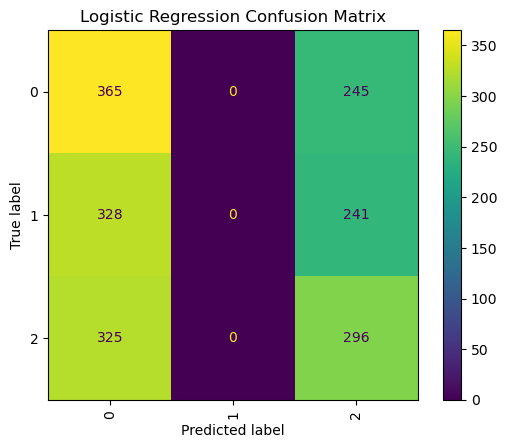

2024/12/21 22:21:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression Test F1-score: 0.2901186354500681


🏃 View run Logistic Regression at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5/runs/b316f507f57f4489a636e585414e6357
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5


Starting hyperparameter tuning for: Ridge Classifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Ridge Classifier: {'classifier__alpha': 0.1}

Ridge Classifier Results:
Confusion Matrix:
 [[364   0 246]
 [328   0 241]
 [323   0 298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.60      0.45       610
           1       0.00      0.00      0.00       569
           2       0.38      0.48      0.42       621

    accuracy                           0.37      1800
   macro avg       0.25      0.36      0.29      1800
weighted avg       0.25      0.37      0.30      1800



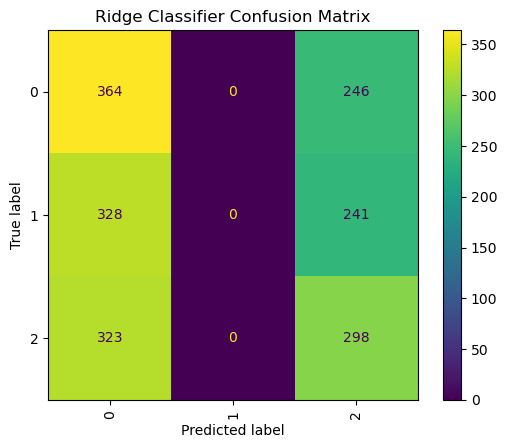

2024/12/21 22:21:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ridge Classifier Test F1-score: 0.2906325272641062


🏃 View run Ridge Classifier at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5/runs/58e41c245c2e4fd6b14fc5bd1577b1dd
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5


Starting hyperparameter tuning for: Random Forest
Fitting 3 folds for each of 20 candidates, totalling 60 fits


Best Parameters for Random Forest: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}

Random Forest Results:
Confusion Matrix:
 [[610   0   0]
 [  0 569   0]
 [  0   0 621]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.00      1.00       569
           2       1.00      1.00      1.00       621

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



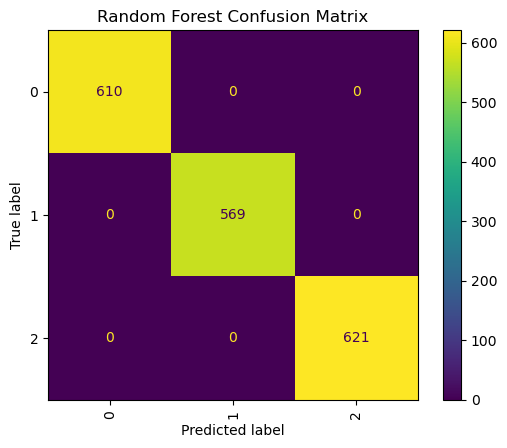

2024/12/21 22:22:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max

🏃 View run Random Forest at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5/runs/3e18be0165f0436a8ac026c4f5e80095
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/5


In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define the preprocessing pipeline
numeric_features = ['Price', 'Discount', 'MarketingSpend']  # Match exact column names
categorical_features = ['ProductCategory']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1.0, 10],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    "Ridge Classifier": {
        'classifier__alpha': [0.1, 1.0, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# Step 5: Perform hyperparameter tuning and evaluation for each classifier
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_2")

for name, model in classifiers.items():
    print(f"Starting hyperparameter tuning for: {name}")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    param_grid = param_grids[name]
    search = RandomizedSearchCV(
        pipeline, param_distributions=param_grid, n_iter=20, cv=3, scoring='f1_macro', verbose=2, random_state=42, n_jobs=-1
    )
    search.fit(X_train, y_train)

    best_pipeline = search.best_estimator_
    print(f"Best Parameters for {name}:", search.best_params_)

    # Test set evaluation
    y_pred = best_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Log results to MLflow
    with mlflow.start_run(run_name=name):
        mlflow.log_params(search.best_params_)
        mlflow.log_metric("test_f1_macro", f1)

        # Log the model
        mlflow.sklearn.log_model(best_pipeline, f"{name}_Pipeline")

        print(f"{name} Test F1-score: {f1}")

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
Ecommerce = pd.read_csv("/Users/ramprakashyallavula/Downloads/ecommerce project/Ecommerce_Sales_Prediction_Dataset.csv")

profile = ProfileReport(Ecommerce, title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Columns in X_train: Index(['ProductCategory', 'Price', 'Discount', 'SaleDate', 'UnitsSold',
       'MarketingSpend'],
      dtype='object')
Feature Engineering Results:
Confusion Matrix:
 [[194   6   3]
 [  3 187   0]
 [  0   6 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       203
           1       0.94      0.98      0.96       190
           2       0.99      0.97      0.98       207

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



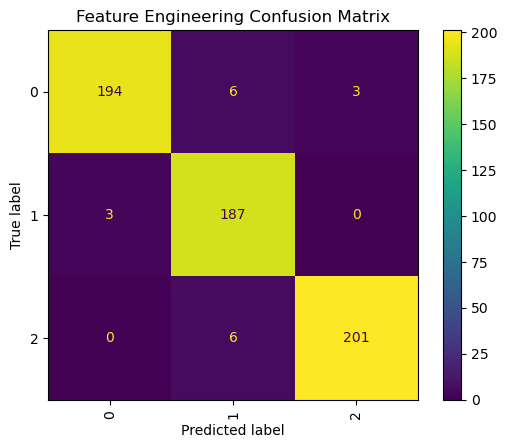

2024/12/21 18:18:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cross-validation mean F1-score: 0.9345051376043421
Test F1-score: 0.9698472594899893
🏃 View run Feature_Engineering_RF at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/6/runs/0abaded3bd7942889df6c38edc0d4d4c
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/6


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Debug column names in training data
print("Columns in X_train:", X_train.columns)

# Step 3: Feature Engineering
# Add new features and combinations
X_train['Price_Discount_Ratio'] = X_train['Price'] / (X_train['Discount'] + 1)
X_test['Price_Discount_Ratio'] = X_test['Price'] / (X_test['Discount'] + 1)

X_train['MarketingSpend_Per_UnitSold'] = X_train['MarketingSpend'] / (X_train['UnitsSold'] + 1)
X_test['MarketingSpend_Per_UnitSold'] = X_test['MarketingSpend'] / (X_test['UnitsSold'] + 1)

# Step 4: Define preprocessing pipeline with PolynomialFeatures
numeric_features = ['Price', 'Discount', 'MarketingSpend', 'Price_Discount_Ratio', 'MarketingSpend_Per_UnitSold']
categorical_features = ['ProductCategory']

numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Add polynomial combinations
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Define model
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Step 6: Evaluate the model and log results to MLflow
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_3")

with mlflow.start_run(run_name="Feature_Engineering_RF"):
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Train and test
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print("Feature Engineering Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("Feature Engineering Confusion Matrix")
    plt.show()

    # Log results to MLflow
    mlflow.log_param("experiment", "Feature Engineering with RF")
    mlflow.log_metric("cv_mean_f1", mean_cv_score)
    mlflow.log_metric("cv_std_f1", std_cv_score)
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(pipeline, "Feature_Engineering_RF_Pipeline")

    print(f"Cross-validation mean F1-score: {mean_cv_score}")
    print(f"Test F1-score: {f1}")

Features dropped due to high correlation: []
Features retained after Variance Threshold: ['Price', 'Discount', 'UnitsSold', 'MarketingSpend']
Features retained after Feature Importance Threshold: ['Price', 'Discount', 'UnitsSold', 'MarketingSpend']
Updated Feature Selection Results:
Confusion Matrix:
 [[194   6   3]
 [  0 190   0]
 [  0   6 201]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       203
           1       0.94      1.00      0.97       190
           2       0.99      0.97      0.98       207

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



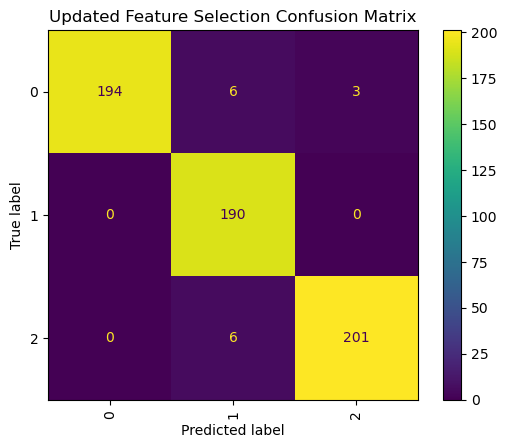

2024/12/21 18:18:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cross-validation mean F1-score: 0.9377760742569979
Test F1-score: 0.9749399732313818
🏃 View run Updated_Feature_Selection_RF at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/7/runs/741eb03bb18b47d6be69531025bc1c0d
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/7


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Correlation Threshold
numeric_X_train = X_train.select_dtypes(include=[np.number])
numeric_X_test = X_test.select_dtypes(include=[np.number])

correlation_matrix = numeric_X_train.corr().abs()
correlation_threshold = 0.6  # Updated threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print("Features dropped due to high correlation:", to_drop)

X_train_corr = numeric_X_train.drop(columns=to_drop)
X_test_corr = numeric_X_test.drop(columns=to_drop)

# Step 4: Variance Threshold
variance_selector = VarianceThreshold(threshold=0.01)
X_train_var = variance_selector.fit_transform(X_train_corr)
X_test_var = variance_selector.transform(X_test_corr)

selected_features_var = X_train_corr.columns[variance_selector.get_support()]
print("Features retained after Variance Threshold:", list(selected_features_var))

# Step 5: Feature Importance using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_var, y_train)
feature_importances = rf_model.feature_importances_

# Select features based on importance threshold
importance_threshold = 0.01  # Updated threshold
important_features = selected_features_var[feature_importances > importance_threshold]
print("Features retained after Feature Importance Threshold:", list(important_features))

X_train_imp = numeric_X_train[important_features]
X_test_imp = numeric_X_test[important_features]

# Step 6: Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)
search.fit(X_train_imp, y_train)
best_rf = search.best_estimator_

# Step 7: Evaluate the Model and Log Results
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_4")

with mlflow.start_run(run_name="Updated_Feature_Selection_RF"):
    # Cross-validation
    cv_scores = cross_val_score(best_rf, X_train_imp, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Train and test
    best_rf.fit(X_train_imp, y_train)
    y_pred = best_rf.predict(X_test_imp)

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("Updated Feature Selection Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("Updated Feature Selection Confusion Matrix")
    plt.show()

    # Log results to MLflow
    mlflow.log_param("model", "Random Forest with Updated Selection")
    mlflow.log_metric("cv_mean_f1", mean_cv_score)
    mlflow.log_metric("cv_std_f1", std_cv_score)
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(best_rf, "Updated_Feature_Selection_RF_Pipeline")

    print(f"Cross-validation mean F1-score: {mean_cv_score}")
    print(f"Test F1-score: {f1}")

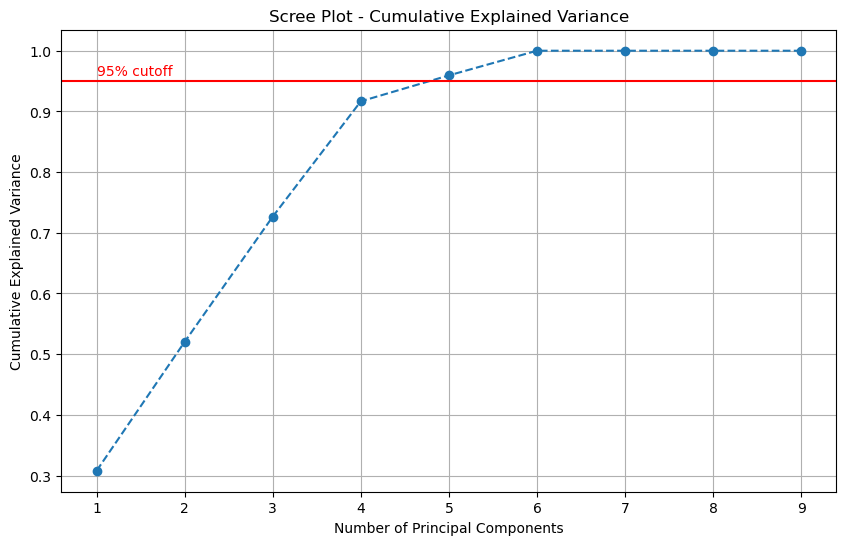

Number of components selected to retain 95% variance: 5
PCA Experiment Results:
Confusion Matrix:
 [[197   3   3]
 [  0 187   3]
 [  0   6 201]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       203
           1       0.95      0.98      0.97       190
           2       0.97      0.97      0.97       207

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



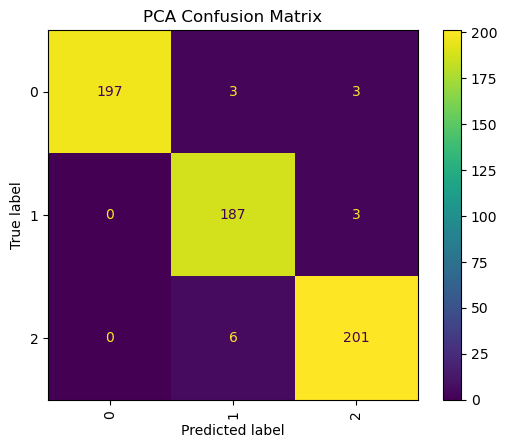

2024/12/21 18:18:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cross-validation mean F1-score: 0.9315312574482544
Test F1-score: 0.9749754699506896
🏃 View run PCA_RF at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/8/runs/36aaf7aea7684339a28084fef51484dc
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/8


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define preprocessing and PCA pipeline
numeric_features = ['Price', 'Discount', 'UnitsSold', 'MarketingSpend']
categorical_features = ['ProductCategory']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply PCA
pca = PCA()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit pipeline to the training data and calculate explained variance
pipeline.fit(X_train)
X_train_pca = pipeline.transform(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')  # Mark 95% explained variance
plt.text(1, 0.96, '95% cutoff', color='red')
plt.grid()
plt.show()

# Select number of components to retain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components selected to retain 95% variance: {n_components}")

# Update PCA with selected components
pca = PCA(n_components=n_components)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 4: Evaluate the model and log results to MLflow
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_5")

with mlflow.start_run(run_name="PCA_RF"):
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Train and test
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("PCA Experiment Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("PCA Confusion Matrix")
    plt.show()

    # Log results to MLflow
    mlflow.log_param("n_components", n_components)
    mlflow.log_param("model", "Random Forest with PCA")
    mlflow.log_metric("cv_mean_f1", mean_cv_score)
    mlflow.log_metric("cv_std_f1", std_cv_score)
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(pipeline, "PCA_RF_Pipeline")

    print(f"Cross-validation mean F1-score: {mean_cv_score}")
    print(f"Test F1-score: {f1}")

Custom Experiment Results:
Confusion Matrix:
 [[194   6   3]
 [  0 190   0]
 [  0   6 201]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       203
           1       0.94      1.00      0.97       190
           2       0.99      0.97      0.98       207

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



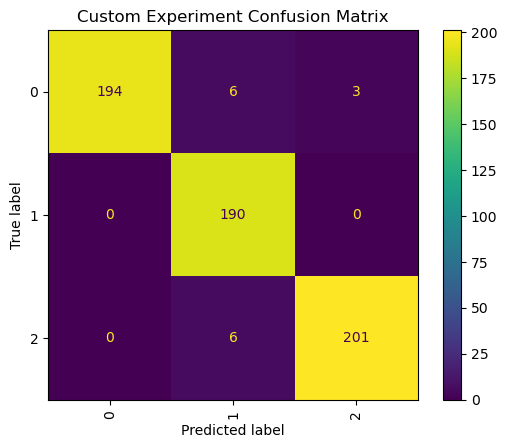

2024/12/21 18:19:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cross-validation mean F1-score: 0.9387201279706412
Test F1-score: 0.9749399732313818
🏃 View run Custom_Stacking_Classifier at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/9/runs/c461b1b784b0442781f0788217ffdd24
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/9


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define preprocessing
numeric_features = ['Price', 'Discount', 'UnitsSold', 'MarketingSpend']
categorical_features = ['ProductCategory']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Define base classifiers for stacking
base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, kernel='linear', random_state=42))
]

# Step 5: Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Step 6: Create pipeline with stacking classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

# Step 7: Evaluate the model and log results to MLflow
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_6")

with mlflow.start_run(run_name="Custom_Stacking_Classifier"):
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Train and test
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("Custom Experiment Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("Custom Experiment Confusion Matrix")
    plt.show()

    # Log results to MLflow
    mlflow.log_param("model", "Stacking Classifier")
    mlflow.log_param("base_classifiers", [name for name, _ in base_classifiers])
    mlflow.log_param("final_estimator", "Logistic Regression")
    mlflow.log_metric("cv_mean_f1", mean_cv_score)
    mlflow.log_metric("cv_std_f1", std_cv_score)
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(pipeline, "Custom_Stacking_Classifier_Pipeline")

    print(f"Cross-validation mean F1-score: {mean_cv_score}")
    print(f"Test F1-score: {f1}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END voting_clf__gradient_boosting__learning_rate=0.01, voting_clf__gradient_boosting__n_estimators=50, voting_clf__random_forest__max_depth=20, voting_clf__random_forest__n_estimators=200, voting_clf__svm__C=0.1; total time=   1.0s
[CV] END voting_clf__gradient_boosting__learning_rate=0.01, voting_clf__gradient_boosting__n_estimators=50, voting_clf__random_forest__max_depth=20, voting_clf__random_forest__n_estimators=200, voting_clf__svm__C=0.1; total time=   1.0s
[CV] END voting_clf__gradient_boosting__learning_rate=0.01, voting_clf__gradient_boosting__n_estimators=50, voting_clf__random_forest__max_depth=None, voting_clf__random_forest__n_estimators=200, voting_clf__svm__C=0.1; total time=   1.0s
[CV] END voting_clf__gradient_boosting__learning_rate=0.01, voting_clf__gradient_boosting__n_estimators=50, voting_clf__random_forest__max_depth=None, voting_clf__random_forest__n_estimators=200, voting_clf__svm__C=0.1; total 

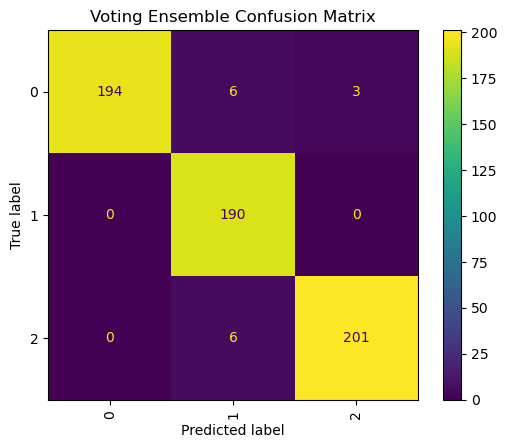

2024/12/21 18:20:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Test F1-score: 0.9749399732313818
Best Parameters from RandomizedSearchCV:
{'voting_clf__svm__C': 0.1, 'voting_clf__random_forest__n_estimators': 200, 'voting_clf__random_forest__max_depth': None, 'voting_clf__gradient_boosting__n_estimators': 50, 'voting_clf__gradient_boosting__learning_rate': 0.01}
🏃 View run Voting_Ensemble at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/10/runs/cbde84135722427997b8880245d3241f
🧪 View experiment at: https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow/#/experiments/10


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Step 1: Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/ramprakashyallavula/Ecommerec.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ramprakashyallavula'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '07aed3f35e5f9433af066135cb913803ce005000'

# Step 2: Prepare the data
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
df['CustomerSegmentName'] = df['CustomerSegmentName'].astype('category').cat.codes

target_column = 'CustomerSegmentName'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define preprocessing
numeric_features = ['Price', 'Discount', 'UnitsSold', 'MarketingSpend']
categorical_features = ['ProductCategory']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Define base classifiers
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svc_clf = SVC(probability=True, random_state=42)

# Step 5: Create a voting ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('gradient_boosting', gb_clf),
        ('svm', svc_clf)
    ],
    voting='soft'  # 'soft' for probabilities; 'hard' for majority voting
)

# Step 6: Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'voting_clf__random_forest__n_estimators': [50, 100, 200],
    'voting_clf__random_forest__max_depth': [None, 10, 20],
    'voting_clf__gradient_boosting__learning_rate': [0.01, 0.1, 0.2],
    'voting_clf__gradient_boosting__n_estimators': [50, 100, 200],
    'voting_clf__svm__C': [0.1, 1.0, 10]
}

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 7: Evaluate the model and log results to MLflow
mlflow.set_experiment("Ecommerce_Sales_Prediction_Experiment_7")

with mlflow.start_run(run_name="Voting_Ensemble"):
    # Train with RandomizedSearchCV
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_

    # Test set evaluation
    y_pred = best_pipeline.predict(X_test)

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("Voting Ensemble Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="viridis", xticks_rotation='vertical')
    plt.title("Voting Ensemble Confusion Matrix")
    plt.show()

    # Log results to MLflow
    mlflow.log_param("experiment", "Voting Ensemble")
    mlflow.log_params(search.best_params_)
    mlflow.log_metric("test_f1_macro", f1)

    # Log the model
    mlflow.sklearn.log_model(best_pipeline, "Voting_Ensemble_Pipeline")

    print(f"Test F1-score: {f1}")
    print("Best Parameters from RandomizedSearchCV:")
    print(search.best_params_)

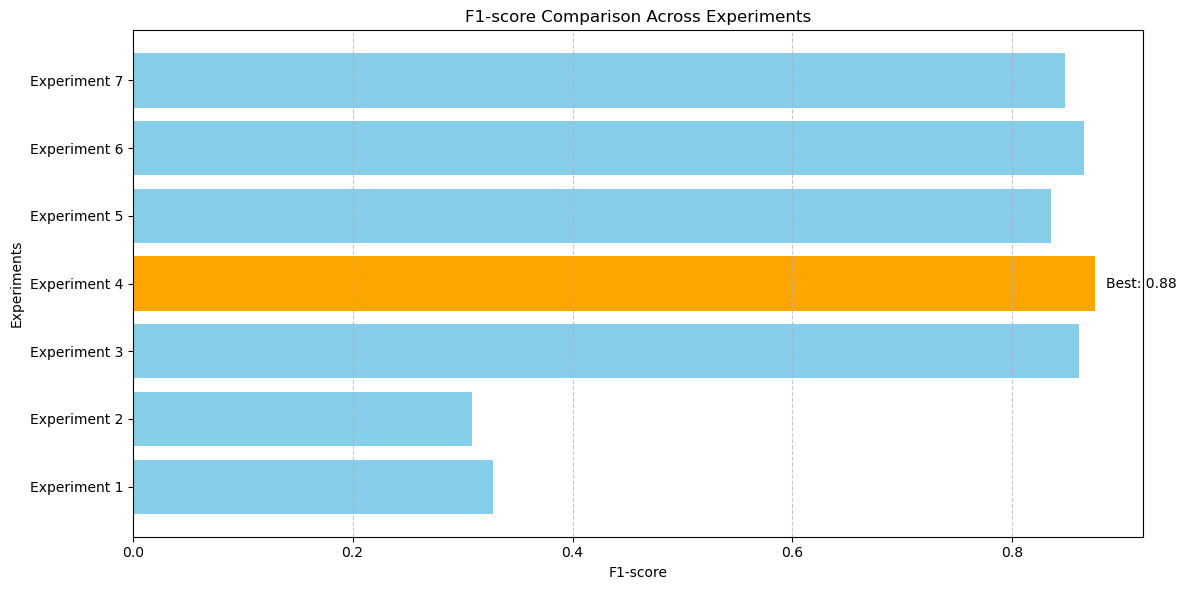

In [ ]:
import matplotlib.pyplot as plt

# F1-scores from the experiments
f1_scores = {
    "Experiment 1": 0.3277,
    "Experiment 2": 0.3082,
    "Experiment 3": 0.8608,
    "Experiment 4": 0.8754,
    "Experiment 5": 0.8348,
    "Experiment 6": 0.8653,
    "Experiment 7": 0.8477,
}

# Extract experiment names and F1-scores
experiments = list(f1_scores.keys())
scores = list(f1_scores.values())

# Plot the F1-scores
plt.figure(figsize=(12, 6))
plt.barh(experiments, scores, color="skyblue")
plt.xlabel("F1-score")
plt.ylabel("Experiments")
plt.title("F1-score Comparison Across Experiments")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Highlight the best experiment
best_idx = scores.index(max(scores))
plt.barh(experiments[best_idx], scores[best_idx], color="orange")
plt.text(scores[best_idx] + 0.01, best_idx, f"Best: {scores[best_idx]:.2f}", va="center")

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Replace this with the actual best model from your experiments
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example data (use your actual dataset and preprocessing pipeline)
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (replace with your chosen model and hyperparameters)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_model, "final_model.joblib")
print("Model saved successfully as final_model.joblib")

Model saved successfully as final_model.joblib


In [ ]:
pip install fastapi uvicorn joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import joblib
import numpy as np

# Load the model
model = joblib.load("final_model.joblib")

# Validate prediction using a test input (replace with actual feature values from your dataset)
test_input = np.array([[12.5, 3.8, 7.4, 1.9]])  # Replace with real feature values
try:
    prediction = model.predict(test_input)
    print(f"Model Prediction Test Successful: {prediction}")
except Exception as e:
    print(f"Error in Model Prediction: {e}")

Model Prediction Test Successful: [2]


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Initialize FastAPI
app = FastAPI(
    title="Ecommerce Sales Prediction API",
    description="API to predict sales based on features like Category, Revenue, Price, and Quantity.",
    version="1.0.0"
)

# Load the trained model
model = joblib.load("final_model.joblib")

# Define input schema
class InputData(BaseModel):
    Category: float  # Replace with actual feature names from your dataset
    Revenue: float
    Price: float
    Quantity: float

def read_root():
    return {"message": "Welcome to the FastAPI application!"}
@app.post("/predict/")
def predict(data: InputData):
    # Prepare input data
    input_array = np.array([[data.Category, data.Revenue, data.Price, data.Quantity]])
    prediction = model.predict(input_array)
    return {"prediction": int(prediction[0])}